  # Customer Segmentation with RFM Analysis


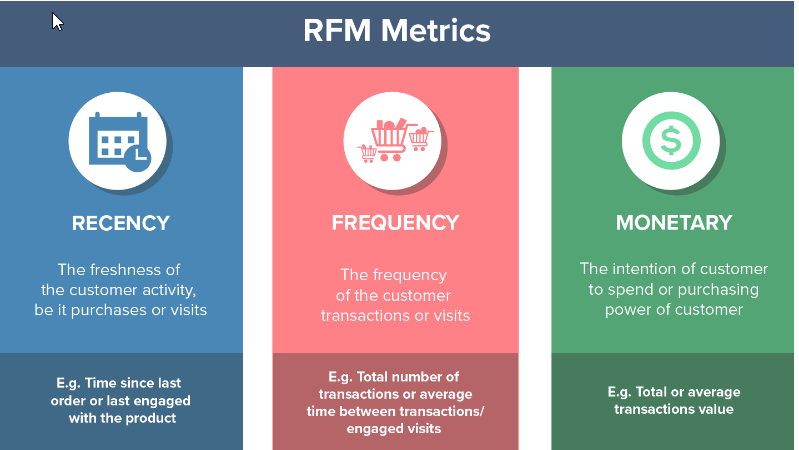


We know FLO as one of the largest shoe companies in Turkey. In this project, analysis will be made so that FLO can divide its customers into segments and take action with campaigns suitable for these segments.

Dataset Story
The data set consists of information obtained from the past shopping behavior of customers who made their last purchases from 

**master_id:** Unique customer number

**order_channel:** Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile)

**last_order_channel:** Channel where the last purchase was made

**first_order_date:** The date of the customer's first purchase

**last_order_date:** The last shopping date of the customer

**last_order_date_online:** The last shopping date of the customer on the online platform

**last_order_date_offline:** The last shopping date of the customer on the offline platform

**order_num_total_ever_online:** Total number of purchases made by the customer on the online platform

**order_num_total_ever_offline:** Total number of purchases made by the customer offline

**customer_value_total_ever_online:** Total price paid by the customer for offline purchases

**customer_value_total_ever_offline:** The total price paid by the customer for online purchases

**interested_in_categories_12:** List of categories the customer has shopped in the last 12 months



# Data Understanding and Preparation


In [3]:
import pandas as pd
import datetime as dt
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.3f' % x) # ondalık gösterimi
df_ = pd.read_csv("flo_data_20k.csv", sep=',')
df = df_.copy()


In [7]:
print(" SHAPE ".center(90, '~'))
print("%d rows and %d columns" % df.shape)
print(" TYPES ".center(90, '~'))
print(df.dtypes)
#print(" HEAD ".center(90, '~'))
#print(df.head(5))
print(" NA ".center(90, '~'))
print(df.isna().sum())
print(" DESC ".center(90, '~'))
print(df.describe([0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95]).T)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
19945 rows and 12 columns
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ NA ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date              

**New variables for each customer's total number of purchases and spending**
           

In [8]:
df["total_order_num"]=df["order_num_total_ever_online"]+df["order_num_total_ever_offline"]
df["total_customer_value"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]


**We change the type of variables expressing date to date**

In [9]:
for col in df.columns:
    if "date" in col:
        df[col] = pd.to_datetime(df[col])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

**Distribution of the number of customers, average number of products purchased and average expenditures in shopping channels**

In [14]:
df.groupby("order_channel").agg({"total_order_num": ["count", "sum"],
                                 "total_customer_value": ["sum", "mean"]})

total_order_num           total_customer_value        
                        count       sum                  sum    mean
order_channel                                                       
Android App              9495 52269.000          7819062.760 823.493
Desktop                  2735 10920.000          1610321.460 588.783
Ios App                  2833 15351.000          2525999.930 891.634
Mobile                   4882 21679.000          3028183.160 620.275

**Top 10 customers with the most revenue**

In [15]:
df.groupby("master_id").agg({"total_customer_value": "sum"}).sort_values(by="total_customer_value", ascending=False).head(10)

,total_customer_value
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.290
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.410
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.340
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.100
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240


**Top 10 customers with the most orders**

In [17]:

df.groupby("master_id").agg({"total_order_num": "sum"}).sort_values(by="total_order_num", ascending=False).head(10)

,total_order_num
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.000
cba59206-9dd1-11e9-9897-000d3a38a36f,131.000
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.000
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.000
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.000
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.000
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.000
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.000
d696c654-2633-11ea-8e1c-000d3a38a36f,70.000


# Calculation of RFM Metrics

In [18]:
today_date = dt.datetime(2021, 6, 1)

rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days ,
                                     'total_order_num':  lambda total_order_num: total_order_num,
                                     'total_customer_value': lambda total_customer_value: total_customer_value.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330


# Calculation of RF and RFM Scores

In [19]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54


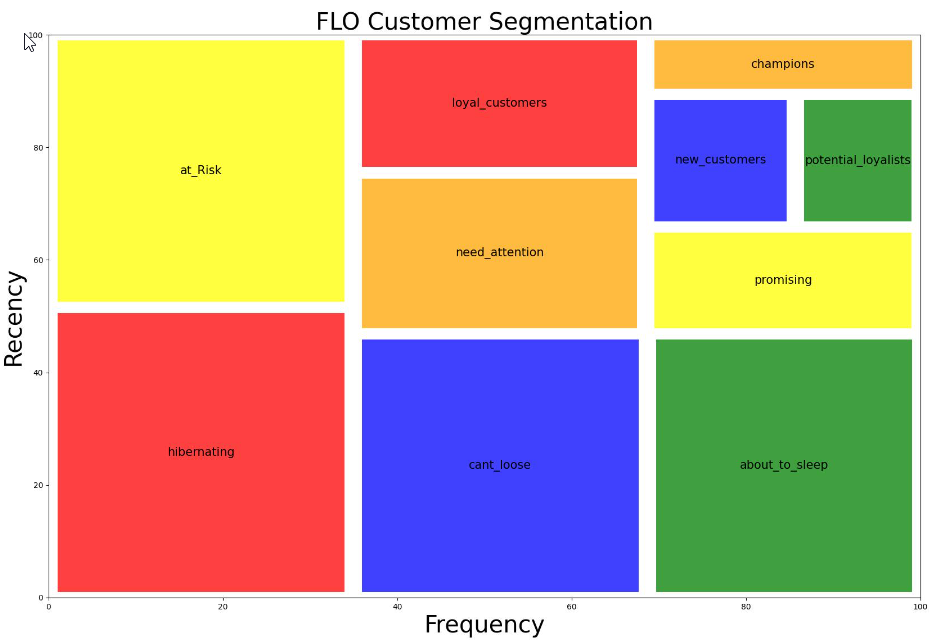

# Defining RF Scores as Segments

In [20]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)
rfm.head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.000,776.070,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.000,269.470,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.000,722.690,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.000,1620.330,5,4,5,54,champions


**Recency, frequency and monetary averages of segments**

In [21]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      114.032  1643     2.407  1643  361.649  1643
at_Risk             242.329  3152     4.470  3152  648.325  3152
cant_loose          235.159  1194    10.717  1194 1481.652  1194
champions            17.142  1920     8.965  1920 1410.709  1920
hibernating         247.426  3589     2.391  3589  362.583  3589
loyal_customers      82.558  3375     8.356  3375 1216.257  3375
need_attention      113.037   806     3.739   806  553.437   806
new_customers        17.976   673     2.000   673  344.049   673
potential_loyalists  36.870  2925     3.311  2925  533.741  2925
promising            58.695   668     2.000   668  334.153   668

**1. FLO is adding a new women's shoe brand. The product prices of the included brand are above general customer preferences. For this reason, it is desired to communicate specifically with customers who will be interested in the promotion of the brand and product sales. Customers who are champions or loyal_customers, those who shop over 250 TL on average and from the women's category, will be contacted specifically. The ID of these customers is requested.**

In [28]:
categories=df[["master_id","interested_in_categories_12"]]
rfm_1=rfm.merge(categories,how="left",on="master_id")


rfm_1=rfm_1[(rfm_1["segment"]=="champions" )| (rfm_1["segment"]=="loyal_customers")]

rfm_1 = rfm_1[(rfm_1["interested_in_categories_12"].str.contains("KADIN")) & (rfm_1["monetary"].mean() > 250)]

rfm_new=rfm_1
rfm_new

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.000,874.160,5,4,4,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
18,003903e0-abce-11e9-a2fc-000d3a38a36f,68,5.000,577.470,4,4,3,44,loyal_customers,[KADIN]
22,004bec18-9f7a-11e9-a2fc-000d3a38a36f,99,12.000,684.910,3,5,4,35,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
25,00534fe4-a6b4-11e9-a2fc-000d3a38a36f,63,16.000,800.590,4,5,4,45,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"
49,009293fe-1f3e-11ea-87bf-000d3a38a36f,129,6.000,725.180,3,4,4,34,loyal_customers,"[COCUK, KADIN, AKTIFSPOR]"
...,...,...,...,...,...,...,...,...,...,...
19931,ffd73136-b098-11e9-9757-000d3a38a36f,100,16.000,2511.480,3,5,5,35,loyal_customers,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
19932,ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f,15,7.000,1423.360,5,5,5,55,champions,"[COCUK, KADIN]"
19936,ffe5c7e8-ee12-11e9-9346-000d3a38a36f,75,4.000,749.840,4,4,4,44,loyal_customers,"[ERKEK, KADIN]"
19939,ffefdd18-77ca-11ea-9b70-000d3a38a36f,74,4.000,208.460,4,4,1,44,loyal_customers,"[COCUK, KADIN]"


**2. Nearly 40% discount is planned for Men's and Children's products. It is intended to specifically target customers who are interested in the categories related to this discount, customers who have been good customers in the past but have not been shopping for a long time, those who are asleep and new customers. The IDs of customers who meet these conditions are requested.**

In [27]:
categories=df[["master_id","interested_in_categories_12"]]
rfm_2=rfm.merge(categories,how="left",on="master_id")
rfm_2= rfm_2[(rfm_2["segment"] == "about_to_sleep") | (rfm_2["segment"] == "cant_loose") | (rfm_2["segment"] == "new_customers")]
rfm_2 = rfm_2[rfm_2["interested_in_categories_12"].str.contains("ÇOCUK | ERKEK")]
rfm_2
              

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
714,08ce95e8-aac9-11e9-a2fc-000d3a38a36f,237,17.000,2689.830,1,5,5,15,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]"
844,0a4e6440-a9dc-11e9-a2fc-000d3a38a36f,273,14.000,2208.530,1,5,5,15,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK]"
1219,0f37c9fc-26c6-11eb-8a9b-000d3a38a36f,162,10.000,1029.880,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK, AKTIFSPOR]"
1352,10f7164e-a8c3-11e9-a2fc-000d3a38a36f,186,8.000,845.360,2,5,4,25,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK, AKTIFSPOR]"
1508,12dd5428-a5b7-11e9-a2fc-000d3a38a36f,184,10.000,1186.350,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK]"
...,...,...,...,...,...,...,...,...,...,...
19256,f7397aea-2076-11ea-87bf-000d3a38a36f,209,9.000,1307.840,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]"
19365,f88cf3ea-47f4-11ea-b6c0-000d3a38a36f,152,7.000,1748.120,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]"
19381,f8b04ba4-5bce-11ea-ba31-000d3a38a36f,196,7.000,1426.220,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK, KADIN]"
19444,f98175f8-a85a-11e9-a2fc-000d3a38a36f,146,18.000,3128.080,2,5,5,25,cant_loose,"[AKTIFCOCUK, ERKEK, COCUK]"
